# Dataset Exploration

### Initial exploration

In this section we will take a look at the dataset and check for:
- class distribution

In [10]:
import pandas as pd
import json

with open('train.json', 'r') as fp:
    j = json.load(fp)

In [11]:
df_train = pd.DataFrame(j.values())

In [12]:
df_train.head()

,claim,label,evidence
0,Nikolaj Coster-Waldau worked with the Fox Broa...,SUPPORTS,"[[Fox_Broadcasting_Company, 0], [Nikolaj_Coste..."
1,Roman Atwood is a content creator.,SUPPORTS,"[[Roman_Atwood, 1], [Roman_Atwood, 3]]"
2,"History of art includes architecture, dance, s...",SUPPORTS,"[[History_of_art, 2]]"
3,Adrienne Bailon is an accountant.,REFUTES,"[[Adrienne_Bailon, 0]]"
4,System of a Down briefly disbanded in limbo.,NOT ENOUGH INFO,[]


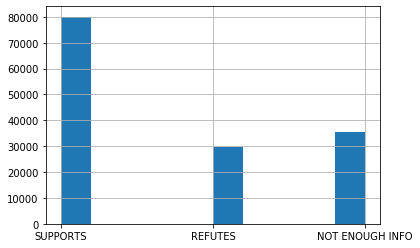

In [13]:
df_train['label'].hist()

### Dataset needs to be processed...
- Balancing
- Removing 'NOT ENOUGH INFO'

In [14]:
df_train = df_train[df_train.label != "NOT ENOUGH INFO"]

In [15]:
df_train = df_train.sort_values(by='label', ascending=True)
df_train

,claim,label,evidence
129856,Alec Baldwin has played only leading roles.,REFUTES,"[[Alec_Baldwin, 3]]"
111147,The Berlin Wall was only standing for 10 years.,REFUTES,"[[Berlin_Wall, 0]]"
125177,21 Jump Street was released theatrically on Ma...,REFUTES,"[[21_Jump_Street_-LRB-film-RRB-, 4]]"
69282,True Blood is not a horror television series.,REFUTES,"[[Dark_fantasy, 0], [True_Blood, 0], [Dark_fan..."
69283,Julius Caesar only crossed the Rubicon in 54 BC.,REFUTES,"[[Julius_Caesar, 12]]"
...,...,...,...
56137,Jerome is recognized as a Doctor of the Church.,SUPPORTS,"[[Jerome, 11]]"
56136,Lahore contains Lahore Fort in its eastern dis...,SUPPORTS,"[[Lahore, 21]]"
56135,Washington Naval Conference was held in Washin...,SUPPORTS,"[[Washington_Naval_Conference, 0], [Washington..."
56131,Rona Munro is a scriptwriter for Doctor Who.,SUPPORTS,"[[Doctor_Who_-LRB-series_10-RRB-, 11]]"


In [16]:
df_train['label'].value_counts()
df_train.label.value_counts()

SUPPORTS    80035
REFUTES     29775
Name: label, dtype: int64

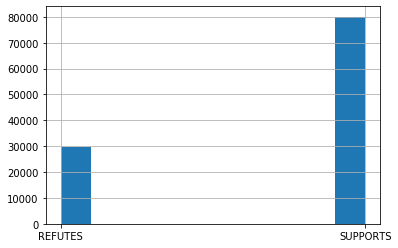

In [17]:
df_train['label'].hist()

In [18]:
len(df_train)

109810

In [19]:
df_train[:2].to_dict('records')

[{'claim': 'Alec Baldwin has played only leading roles.',
  'label': 'REFUTES',
  'evidence': [['Alec_Baldwin', 3]]},
 {'claim': 'The Berlin Wall was only standing for 10 years.',
  'label': 'REFUTES',
  'evidence': [['Berlin_Wall', 0]]}]

In [20]:
df_train['claim'].describe()

count                                                109810
unique                                               102292
top       International Relations only includes the ente...
freq                                                     29
Name: claim, dtype: object

In [30]:
longest_idx = df_train['claim'].str.len().argmax()
longest_claim = df_train.iloc[longest_idx].claim
longest_claim

'International Relations includes technology and engineering, economics, communication studies, history, international law, demography, philosophy, geography, social work, sociology, anthropology, criminology, psychology, gender studies, cultural studies, culturology, and diplomacy, globalization, diplomatic relations, state sovereignty, international security, ecological sustainability, nuclear proliferation, nationalism, economic development, global finance, as well as terrorism and organized crime, human security, foreign interventionism, and human rights, as well, as, more recently, comparative religion.'

In [35]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
tokens = word_tokenize(longest_claim)

[nltk_data] Downloading package punkt to /home/jack/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
len(tokens)

99